# Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
class MyLinearRegression:
    def __init__(self, weights_init='random', add_bias = True, learning_rate=1e-5, 
        num_iterations=1_000, verbose=False, max_error=1e-5):
        ''' Linear regression model using gradient descent 

        # Arguments
            weights_init: str
                weights initialization option ['random', 'zeros']
            add_bias: bool
                whether to add bias term 
            learning_rate: float
                learning rate value for gradient descent
            num_iterations: int 
                maximum number of iterations in gradient descent
            verbose: bool
                enabling verbose output
            max_error: float
                error tolerance term, after reaching which we stop gradient descent iterations
        '''

        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.weights_init = weights_init
        self.add_bias = add_bias
        self.verbose = verbose
        self.max_error = max_error
    
    def initialize_weights(self, n_features):
        ''' weights initialization function '''
        if self.weights_init == 'random':
            weights = np.random.randn(n_features) * 0.01  # Small random numbers
        elif self.weights_init == 'zeros':
            weights = np.zeros(n_features)
        else:
            raise NotImplementedError("weights_init must be either 'random' or 'zeros'")
        return weights

    def cost(self, target, pred):
        ''' calculate cost function 
        # Arguments:
            target: np.array
                array of target floating point numbers 
            pred: np.array
                array of predicted floating points numbers
        '''
        loss = np.mean((target - pred) ** 2)
        return loss

    def fit(self, x, y):
        if self.add_bias:
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        
        y = y.flatten()
    
        self.weights = self.initialize_weights(x.shape[1]) 
    
        for i in range(self.num_iterations):
            pred = x @ self.weights 
            current_loss = self.cost(y, pred) 
            
            gradient = -(2 / x.shape[0]) * (x.T @ (y - pred)) 
    
            self.weights -= self.learning_rate * gradient 
    
            new_loss = self.cost(y, pred)
    
            if abs(new_loss - current_loss) < self.max_error:
                if self.verbose:
                    print(f'Convergence reached at iteration {i}')
                break
    
            if self.verbose and i % 100 == 0:
                print(f'Iteration {i}: Loss = {current_loss}')

    def score(self, X, y):
        '''Calculate the R² score of the model.'''
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        r_squared = 1 - (ss_residual / ss_total)
        return r_squared
    
    def predict(self, x):
        ''' prediction function '''
        if self.add_bias:
            # Add bias term if applicable
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        y_hat = x @ self.weights  # Matrix multiplication
        return y_hat

In [3]:
def normal_equation(X, y):
    ''' Calculate weights using the Normal Equation '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    return weights

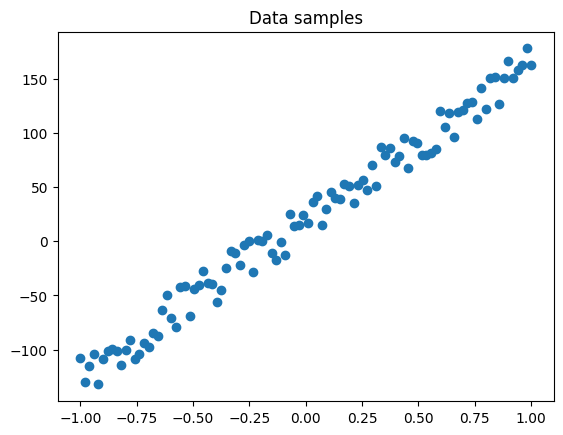

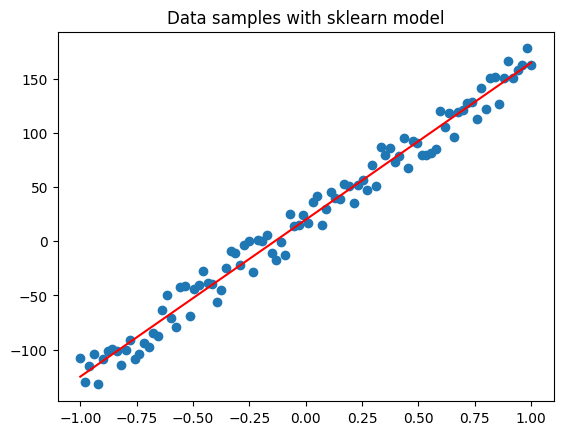

Sklearn MSE:  137.6392377281502
My MSE:  7667.6060476375405
Normal equation MSE:  137.63923772815022


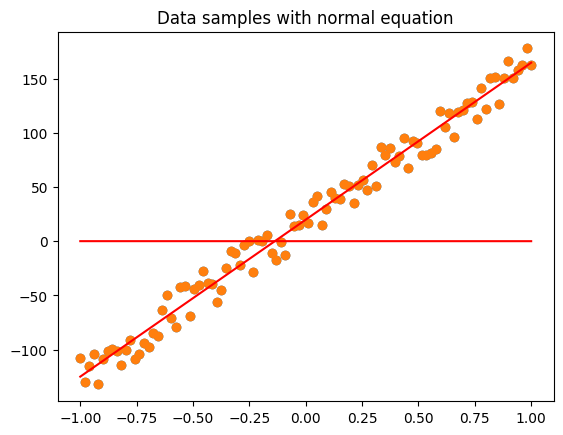

In [4]:
if __name__ == "__main__":
    # generating data samples
    x = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
    y = 29 * x + 40 * np.random.rand(100,1)

    # normalization of input data
    x /= np.max(x)

    plt.title('Data samples')
    plt.scatter(x, y)
    plt.savefig('data_samples.png')
    plt.show()

    # Sklearn linear regression model
    sklearn_model = LinearRegression()
    sklearn_model.fit(x, y)
    y_hat_sklearn = sklearn_model.predict(x)

    plt.title('Data samples with sklearn model')
    plt.scatter(x, y)
    plt.plot(x, y_hat_sklearn, color='r')
    plt.savefig('sklearn_model.png')
    plt.show()
    print('Sklearn MSE: ', mean_squared_error(y, y_hat_sklearn))

    # Your linear regression model
    my_model = MyLinearRegression()
    my_model.fit(x, y)
    y_hat = my_model.predict(x)

    plt.title('Data samples with my model')
    plt.scatter(x, y)
    plt.plot(x, y_hat, color='r')
    plt.savefig('my_model.png')
    print('My MSE: ', mean_squared_error(y, y_hat))

    # Normal equation
    weights = normal_equation(x, y)
    x_with_bias = np.hstack((np.ones((x.shape[0], 1)), x))  # Bias term
    y_hat_normal = x_with_bias @ weights

    plt.title('Data samples with normal equation')
    plt.scatter(x, y)
    plt.plot(x, y_hat_normal, color='r')
    plt.savefig('normal_equation.png')
    print('Normal equation MSE: ', mean_squared_error(y, y_hat_normal))

# Part 2

In [5]:
import os
import pandas as pd
from PIL import Image

In [6]:
def load_data(image_folder: str, label_file: str, image_size=(128, 128)):
    ''' Loads images and labels from the specified folder and file.'''
    # Load labels file
    labels_df = pd.read_csv(label_file, sep='|')
    
    images = []
    labels = []
    
    for _, row in labels_df.iterrows():
        image_name = row['image_name'].strip()
        label = row['label'].strip()
        
        image_path = os.path.join(image_folder, image_name)
        
        if os.path.exists(image_path):
            image = Image.open(image_path)
            image = image.resize(image_size)
            images.append(np.array(image))
            labels.append(label)
        else:
            print(f"Image {image_name} not found in {image_folder}.")

    int_labels = convert_labels_to_integers(labels)
    
    return np.array(images), int_labels

In [18]:
image_folder = 'dataset/flickr30k_images/' 
label_file = 'dataset/labels.csv' 

images, labels = load_data(image_folder, label_file)

print(f"Number of images loaded: {len(images)}")
print(f"Labels: {labels}")

Number of images loaded: 300
Labels: [1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0]


In [19]:
def vectorize_images(images: np.ndarray):
    ''' Vectorizes images into a matrix of size (N, D) by converting them to grayscale and flattening.'''
    X = []
    for image in images:
        grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])  # Using the luminance formula
        flattened_image = grayscale_image.flatten()
        X.append(flattened_image)
    return np.array(X)

In [20]:
def vectorize_images_mean(images: np.ndarray):
    ''' Vectorizes images into a matrix of size (N, D) by taking the mean across the RGB channels and flattening.'''
    X = []
    for image in images:
        mean_image = np.mean(image, axis=0)
        flattened_image = mean_image.flatten()
        X.append(flattened_image)
    return np.array(X)

In [21]:
def convert_labels_to_integers(labels):
    ''' Converts text labels to integers: 0 for humans, 1 for animals.'''
    label_map = {
        "human": 0,
        "animal": 1
    }
    
    int_labels = [label_map.get(label.strip(), -1) for label in labels]
    
    if -1 in int_labels:
        raise ValueError("Encountered unexpected label in the dataset.")
    
    return np.array(int_labels)

In [22]:
from sklearn.model_selection import train_test_split, LeaveOneOut

def validation_split(X: np.ndarray, y: np.ndarray, test_size: float, val_size: float = 0.2):
    '''Splits data into train, validation, and test.'''
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def create_model(model_name: str):
    ''' Creates a model of the specified name. '''
    if model_name == "MyLinearRegression":
        model = MyLinearRegression()
    elif model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=5) 
    elif model_name == "DecisionTree":
        model = DecisionTreeClassifier(random_state=42)
    else:
        raise ValueError(f"Model '{model_name}' is not recognized.")
    
    return model

In [24]:
from sklearn.model_selection import KFold

def k_fold_validation(X: np.ndarray, y: np.ndarray, model_name: str, n_splits: int = 5):
    ''' Performs K-Fold validation on the dataset. '''
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model(model_name)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"K-Fold Validation Accuracy of {model_name}: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")

In [25]:
from sklearn.model_selection import StratifiedKFold

def stratified_k_fold_validation(X: np.ndarray, y: np.ndarray, model_name: str, n_splits: int = 5):
    ''' Performs Stratified K-Fold validation on the dataset. '''
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model(model_name)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Stratified K-Fold Validation Accuracy of {model_name}: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")

In [26]:
import matplotlib.pyplot as plt

def analyze_misclassified_samples(X_test, y_test, y_pred, images):
    misclassified_indices = np.where(y_test != y_pred)[0]
    
    print(f"Number of misclassified samples: {len(misclassified_indices)}")
    
    # Display the first 10 misclassified samples
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[index])  # Assuming images are in a suitable format
        plt.title(f"True: {y_test[index]}, Pred: {y_pred[index]}")
        plt.axis('off')
    plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming 0: human, 1: animal
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human", "Animal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [28]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    '''Train the model and evaluate its performance.'''
    model.fit(X_train, y_train)
    
    if hasattr(model, 'score'):
        val_accuracy = model.score(X_val, y_val)
        print(f"{model.__class__.__name__} Validation R² Score: {val_accuracy:.2f}")

    y_pred = model.predict(X_test)

    if hasattr(model, 'predict'):
        if model.__class__.__name__ == 'MyLinearRegression':
            mse = mean_squared_error(y_test, y_pred)
            print(f"MyLinearRegression MSE: {mse:.2f}")
        else:
            accuracy = accuracy_score(y_test, y_pred)
            print(f"{model.__class__.__name__} Test Accuracy: {accuracy:.2f}")
    
    return y_pred

In [29]:
def test(image_folder: str, label_file: str, model_name: str, test_size: float = 0.2, n_splits: int = 5):
    # Load data
    images, labels = load_data(image_folder, label_file)

    # 2. Preprocess images and labels
    X = vectorize_images(images)
    y = labels

    # 3. Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # 4. Create model
    model = create_model(model_name)

    # 5. Train model using different validation strategies
    # 1. Train, validation, test splits
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    model.fit(X_train_split, y_train_split)
    val_accuracy = model.score(X_val, y_val)
    print(f"Validation Accuracy: {val_accuracy:.2f}")

    # 2. K-fold cross-validation
    kf = KFold(n_splits=n_splits)
    kfold_accuracies = []

    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
        
        model.fit(X_train_kf, y_train_kf)
        kfold_accuracy = model.score(X_val_kf, y_val_kf)
        kfold_accuracies.append(kfold_accuracy)

    print(f"K-Fold Cross-Validation Accuracy: {np.mean(kfold_accuracies):.2f}")

    # # 3. Leave-one-out cross-validation
    # loo = LeaveOneOut()
    # loo_accuracies = []

    # for train_index, val_index in loo.split(X_train):
    #     X_train_loo, X_val_loo = X_train[train_index], X_train[val_index]
    #     y_train_loo, y_val_loo = y_train[train_index], y_train[val_index]

    #     model.fit(X_train_loo, y_train_loo)
    #     loo_accuracy = model.score(X_val_loo, y_val_loo)
    #     loo_accuracies.append(loo_accuracy)

    # print(f"Leave-One-Out Cross-Validation Accuracy: {np.mean(loo_accuracies):.2f}")

    # 6. Make a prediction on test data
    y_pred = model.predict(X_test)

    # 7. Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")

    # 8. Make error analysis
    # 1. Plot the first 10 test images, and on each image plot the corresponding prediction
    analyze_misclassified_samples(X_test, y_test, y_pred, images)

    # 2. Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred)

Validation Accuracy: 0.48
K-Fold Cross-Validation Accuracy: 0.50
Test Accuracy: 0.67
Number of misclassified samples: 20


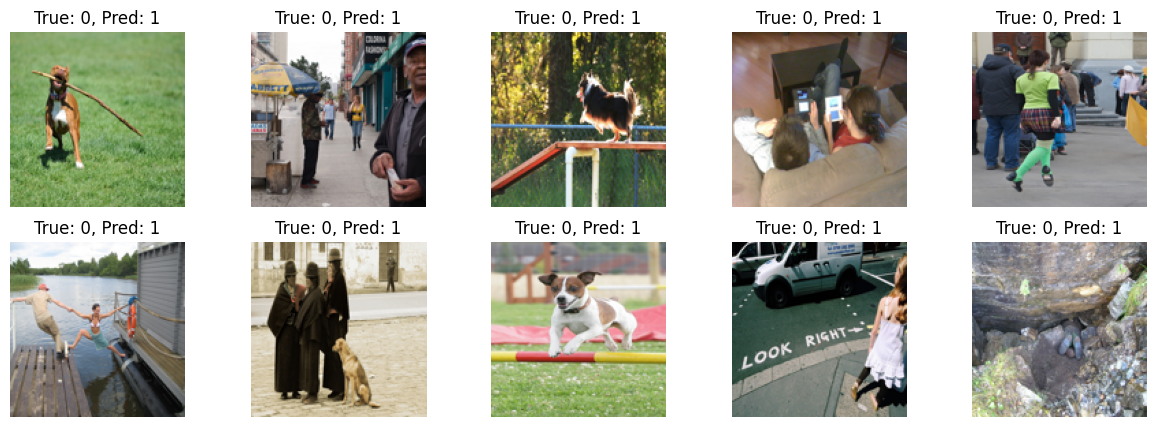

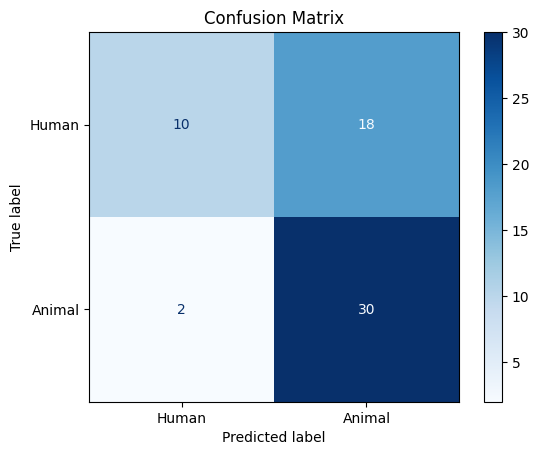

In [30]:
test('dataset/flickr30k_images/', 'dataset/labels.csv', 'KNN')

Validation Accuracy: 0.50
K-Fold Cross-Validation Accuracy: 0.57
Test Accuracy: 0.52
Number of misclassified samples: 29


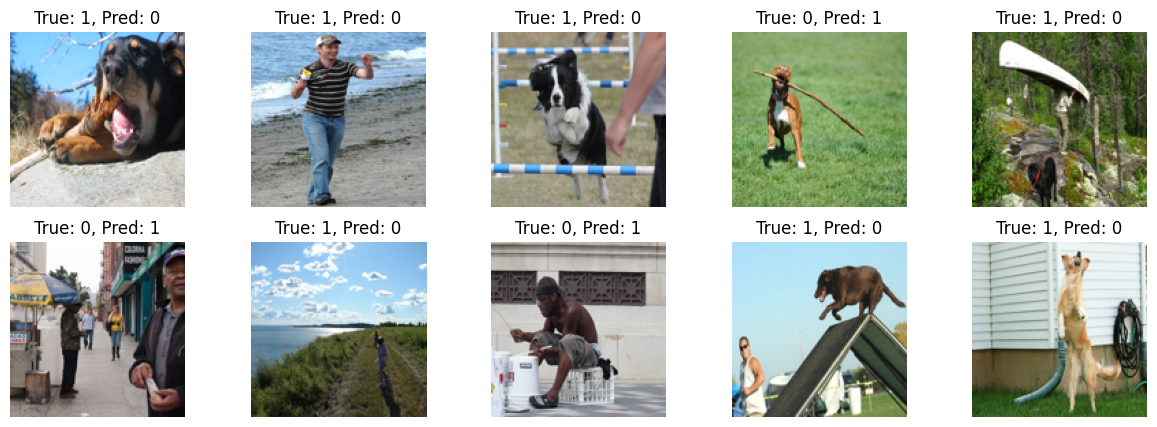

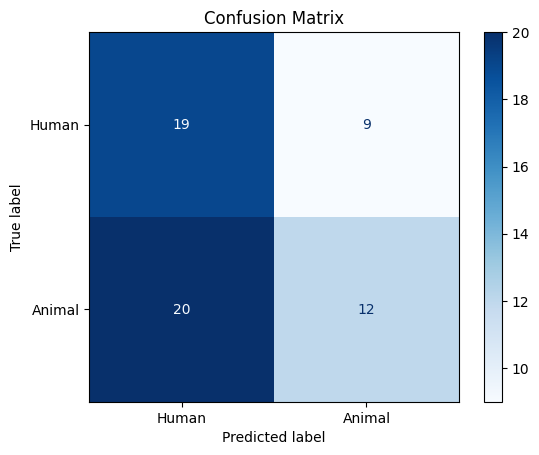

In [31]:
test('dataset/flickr30k_images/', 'dataset/labels.csv', 'DecisionTree')